In [1]:
#installing required libraries
%pip install catboost
%pip install lightgbm
%pip install shap
%pip install catboost
%pip install xgboost
%pip install xgboost
%pip install openpyxl





Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the XGBRegressor model from XGBoost library 
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42)



In [3]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing libraries for model building and model processing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
import lightgbm as lgb
import catboost as cb
import shap
from sklearn.ensemble import StackingRegressor


#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#deriving the function to find the adjusted r squared
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)     # Calculate the R-squared score
    n_samples = len(y_true)           # Number of samples
    # Calculate the adjusted R-squared score
    adj_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adj_r2

In [5]:
#Customizing the settings
pd.options.display.max_columns = None  #setting max viewable columns
pd.options.display.float_format = '{:.2f}'.format  #setting the view in float instead of exponent format

In [6]:
#Reading the raw house data set csv
#download link for innerCity csv file https://drive.google.com/file/d/1ZE8DXHa2JJ7xmw8H_q__lFkA9x623sG6/view?usp=sharing
raw_data = pd.read_csv(r'C:\Users\sushm\OneDrive\Desktop\Jain\Precision-Property-Insights.csv')
print(raw_data.head())


          cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000      4.00       1.75         3050.00   
1  3145600250  20150317T000000  190000      2.00       1.00          670.00   
2  7129303070  20140820T000000  735000      4.00       2.75         3040.00   
3  7338220280  20141010T000000  257000      3.00       2.50         1740.00   
4  7950300670  20150218T000000  450000      2.00       1.00         1120.00   

   lot_measure ceil coast  sight condition  quality  ceil_measure  basement  \
0      9440.00    1     0   0.00         3     8.00       1800.00   1250.00   
1      3101.00    1     0   0.00         4     6.00        670.00      0.00   
2      2415.00    2     1   4.00         3     8.00       3040.00      0.00   
3      3721.00    2     0   0.00         3     8.00       1740.00      0.00   
4      4590.00    1     0   0.00         3     7.00       1120.00      0.00   

  yr_built  yr_renovated  zipcode   lat      long 

In [7]:
raw_data.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,City,County,Type
0,3876100940,20150427T000000,600000,4.00,1.75,3050.00,9440.00,1,0,0.00,3,8.00,1800.00,1250.00,1966,0,98034,47.72,-122.183,2020.00,8660.00,0.00,12490,Kirkland,King,Standard
1,3145600250,20150317T000000,190000,2.00,1.00,670.00,3101.00,1,0,0.00,4,6.00,670.00,0.00,1948,0,98118,47.55,-122.274,1660.00,4100.00,0.00,3771,Seattle,King,Standard
2,7129303070,20140820T000000,735000,4.00,2.75,3040.00,2415.00,2,1,4.00,3,8.00,3040.00,0.00,1966,0,98118,47.52,-122.256,2620.00,2433.00,0.00,5455,Seattle,King,Standard
3,7338220280,20141010T000000,257000,3.00,2.50,1740.00,3721.00,2,0,0.00,3,8.00,1740.00,0.00,2009,0,98002,47.34,-122.213,2030.00,3794.00,0.00,5461,Auburn,King,Standard
4,7950300670,20150218T000000,450000,2.00,1.00,1120.00,4590.00,1,0,0.00,3,7.00,1120.00,0.00,1924,0,98118,47.57,-122.285,1120.00,5100.00,0.00,5710,Seattle,King,Standard


# **1. Data cleaning and preprocessing**

### **Data inspection**


In [8]:
#Inspecting the columns of the data set
raw_data.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'City', 'County', 'Type'],
      dtype='object')

In [9]:
#Inspecting the data types of all the columns of the data set
raw_data.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                 object
coast                object
sight               float64
condition            object
quality             float64
ceil_measure        float64
basement            float64
yr_built             object
yr_renovated          int64
zipcode               int64
lat                 float64
long                 object
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area           object
City                 object
County               object
Type                 object
dtype: object

In [10]:
#Inspecting the shape of raw data
raw_data.shape

(21613, 26)

In [11]:
#Getting the meta information of the housing data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [12]:
#Printing the statistical inference for the data set
raw_data.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,sight,quality,ceil_measure,basement,yr_renovated,zipcode,lat,living_measure15,lot_measure15,furnished
count,21613.00,21613.00,21505.00,21505.00,21596.00,21571.00,21556.00,21612.00,21612.00,21612.00,21613.00,21613.00,21613.00,21447.00,21584.00,21584.00
mean,4580301520.86,540182.16,3.37,2.12,2079.86,15104.58,0.23,7.66,1788.37,291.52,84.40,98077.94,47.56,1987.07,12766.54,0.20
std,2876565571.31,367362.23,0.93,0.77,918.50,41423.62,0.77,1.18,828.10,442.58,401.68,53.51,0.14,685.52,27286.99,0.40
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,0.00,1.00,290.00,0.00,0.00,98001.00,47.16,399.00,651.00,0.00
25%,2123049194.00,321950.00,3.00,1.75,1429.25,5040.00,0.00,7.00,1190.00,0.00,0.00,98033.00,47.47,1490.00,5100.00,0.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,0.00,7.00,1560.00,0.00,0.00,98065.00,47.57,1840.00,7620.00,0.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10684.50,0.00,8.00,2210.00,560.00,0.00,98118.00,47.68,2360.00,10087.00,0.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,4.00,13.00,9410.00,4820.00,2015.00,98199.00,47.78,6210.00,871200.00,1.00


In [13]:
#Counting the null values in each column
raw_data.isna().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
City                  0
County                0
Type                  0
dtype: int64

## Removing unwanted variables


In [14]:
#Removing unwanted features in our dataset
#1.  cid column is removed - reason being it has nothing to do with the model
#2.  yr_renoveted column is being removed as it has over 20000 entries with 0 and has opposed relation with living and lot measure 2015

processing_data = raw_data.drop(['cid', 'yr_renovated'], axis=1)


In [15]:
#printing the dataset columns after removal of unwanted columns
processing_data.columns

Index(['dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area', 'City',
       'County', 'Type'],
      dtype='object')

In [16]:
print(raw_data.columns)

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'City', 'County', 'Type'],
      dtype='object')


## Null values and inappropriate values treatment

In [17]:
#replacing null values in room_bed column with median and rounding off
processing_data['room_bed'] = processing_data['room_bed'].fillna(processing_data['room_bed'].median()).astype(int)
# processed_data = processed_data[processed_data['room_bed'] < 15]

#replacing null values in room_bath column with median and rounding off
processing_data['room_bath'] = processing_data['room_bath'].fillna(processing_data['room_bath'].median()).astype(int)

#replacing null values in living_measure column with median
processing_data['living_measure'] = processing_data['living_measure'].fillna(processing_data['living_measure'].median())

#replacing null values in lot_measure column with median
processing_data['lot_measure'] = processing_data['lot_measure'].fillna(processing_data['lot_measure'].median())

#Converting the '$' values of ceil columns to nan and replacing the nan values with median
processing_data['ceil'] = processing_data['ceil'].replace('[\$,]', '', regex=True)
processing_data['ceil'] = pd.to_numeric(processing_data['ceil'], errors='coerce')
processing_data['ceil'] = processing_data['ceil'].fillna(processing_data['ceil'].median())
processing_data['ceil'] = (
    processing_data['ceil']
    .replace('[\$,]', '', regex=True)  # remove $ and commas
    .replace('', np.nan)               # convert empty strings to NaN
    .astype(float)                     # convert to float
)
processing_data['ceil'] = processing_data['ceil'].fillna(processing_data['ceil'].median())

# Clean 'coast' column
processing_data['coast'] = (
    processing_data['coast']
    .replace('[\$,]', '', regex=True)  # remove $ and commas
    .replace('', np.nan)
)
processing_data['coast'] = pd.to_numeric(processing_data['coast'], errors='coerce')
processing_data['coast'] = processing_data['coast'].fillna(processing_data['coast'].median())
processing_data['coast'] = processing_data['coast'].astype(float)

#Replacing the null values of sight columns with 0 and rounding off to integer
processing_data['sight'] = processing_data['sight'].fillna(0).astype(int)

#Converting the '$' values of coast columns to nan and replacing the nan values with median
processing_data['condition'] = processing_data['condition'].replace('[\$,]', '', regex=True)
processing_data['condition'] = pd.to_numeric(processing_data['condition'], errors='coerce')
processing_data['condition'] = processing_data['condition'].fillna(processing_data['condition'].median())
processing_data['condition'] = processing_data['condition'].astype(float)

#replacing null values in quality column with median and rounding off to integer
processing_data['quality'] = processing_data['quality'].fillna(processing_data['quality'].median()).astype(int)
# processed_data['quality'] = processed_data['quality'].astype(object)

#replacing null values in ceil_measure column with median and rounding off to integer
processing_data['ceil_measure'] = processing_data['ceil_measure'].fillna(processing_data['ceil_measure'].median())

#replacing null values in basement column with median
processing_data['basement'] = processing_data['basement'].fillna(processing_data['basement'].median())

#Converting the '$' values of 'yr_built' columns to nan
processing_data['yr_built'] = raw_data['yr_built']
processing_data['yr_built'] = processing_data['yr_built'].replace('$', np.nan)
#Dropping the rows of yr_built column wherever the value is null
processing_data.dropna(subset=['yr_built'], inplace=True)

#replacing null values in living_measure15 column with median
processing_data['living_measure15'] = processing_data['living_measure15'].fillna(processing_data['living_measure15'].median())

#replacing null values in lot_measure15 column with median
processing_data['lot_measure15'] = processing_data['lot_measure15'].fillna(processing_data['lot_measure15'].median())

#replacing null values in furnished column with median
processing_data['furnished'] = processing_data['furnished'].fillna(processing_data['furnished'].median()) .astype(object)

#Converting the '$' values of long columns to nan
processing_data['long'] = (
    processing_data['long']
    .astype(str)                                  # ensure all are strings first
    .str.replace(r'[^0-9\.-]', '', regex=True)    # remove any non-numeric characters like '$' or spaces
    .replace('', np.nan)                          # replace empty strings with NaN
    .astype(float)                                # convert to float
)
processing_data['long'] = processing_data['long'].replace('$', np.nan)
processing_data['long'] = processing_data['long'].fillna(processing_data['long'].median())
processing_data['long'] = processing_data['long'].astype(float)


#replacing $ and null values in total_area column
#As total area column is the sum of living_measure and lot_measure we are filling the nan values with the sum of living and lot measure values
processing_data['total_area'] = processing_data.apply(lambda row: row['living_measure'] + row['lot_measure'] if row['total_area'] == '$' else row['total_area'], axis=1)
processing_data[raw_data['total_area'] == '$']
processing_data['total_area'] = processing_data['total_area'].astype(float)
processing_data['total_area'] = processing_data['total_area'].fillna(processing_data['total_area'].median())



In [18]:
#Checking whether null values are still there after the null values treatment
processing_data.isna().sum()

dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
City                0
County              0
Type                0
dtype: int64

No null values are being found after the treatment

## Feature generation and transformation

In [19]:
# Decomposing dayhours column into 4 columns (sold_year, sold_month, sold_day,sold_date )
processing_data['dayhours'] = raw_data['dayhours']

#Creating a column sold_year by slicing the year of dayhours column
processing_data['sold_year'] = processing_data['dayhours'].str[0:4]

#Creating a column sold_month by slicing the month of dayhours column
processing_data['sold_month'] = processing_data['dayhours'].str[4:6]


#Creating a column sold_day by slicing the day of sold_day column
processing_data['sold_day'] = processing_data['dayhours'].str[6:8]


#Joining the sold_year, sold_month, sold_day and merging it into new column sold_date
processing_data['sold_date'] =  processing_data['dayhours'].str[6:8] + '-'+processing_data['sold_month']+'-'+ processing_data['sold_year']

# #dropping dayhours column
# processing_data.drop('dayhours', axis=1, inplace=True)


In [20]:
#Converting the newly generated columns into integer
processing_data['sold_day']= processing_data['sold_day'].astype(int)
processing_data['sold_month']= processing_data['sold_month'].astype(int)
processing_data['sold_year']= processing_data['sold_year'].astype(int)

In [21]:
#Generating a feature 'basement_flag' and filling in such a way that if the basement value is > 0 it'll be filled with 1 and else 0
processing_data['basement_flag']=np.where(processing_data['basement']>0,1,0)


In [22]:
#verifying that the newly added features are correctly added
processing_data.head()

,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,City,County,Type,sold_year,sold_month,sold_day,sold_date,basement_flag
0,20150427T000000,600000,4,1,3050.00,9440.00,1.00,0.00,0,3.00,8,1800.00,1250.00,1966,98034,47.72,-122.18,2020.00,8660.00,0.00,12490.00,Kirkland,King,Standard,2015,4,27,27-04-2015,1
1,20150317T000000,190000,2,1,670.00,3101.00,1.00,0.00,0,4.00,6,670.00,0.00,1948,98118,47.55,-122.27,1660.00,4100.00,0.00,3771.00,Seattle,King,Standard,2015,3,17,17-03-2015,0
2,20140820T000000,735000,4,2,3040.00,2415.00,2.00,1.00,4,3.00,8,3040.00,0.00,1966,98118,47.52,-122.26,2620.00,2433.00,0.00,5455.00,Seattle,King,Standard,2014,8,20,20-08-2014,0
3,20141010T000000,257000,3,2,1740.00,3721.00,2.00,0.00,0,3.00,8,1740.00,0.00,2009,98002,47.34,-122.21,2030.00,3794.00,0.00,5461.00,Auburn,King,Standard,2014,10,10,10-10-2014,0
4,20150218T000000,450000,2,1,1120.00,4590.00,1.00,0.00,0,3.00,7,1120.00,0.00,1924,98118,47.57,-122.28,1120.00,5100.00,0.00,5710.00,Seattle,King,Standard,2015,2,18,18-02-2015,0


In [23]:
#Creating Age column and computing it by taking the difference of 2015 - year_built column value
processing_data['yr_built'] = raw_data['yr_built']
processing_data['Age'] = 2015-processing_data['yr_built'].astype(int)
processing_data = processing_data.drop('yr_built', axis=1)
processing_data['Age']

0        49
1        67
2        49
3         6
4        91
         ..
21608    19
21609    76
21610    37
21611    18
21612    90
Name: Age, Length: 21598, dtype: int64

In [24]:
#Generating a new feature named Age_bucket from the age column and which is categorical
age_ranges = [0, 10, 20, 30, 40, float('inf')]
age_labels = [5, 4, 3, 2, 1]

# Create the Age_bucket column using pd.cut()
processing_data['Age_bucket'] = pd.cut(processing_data['Age'], bins=age_ranges, labels=age_labels, right=False)

# Convert the Age_bucket column to object type
processing_data['Age_bucket'] = processing_data['Age_bucket'].astype(int)
processing_data['Age_bucket'] = processing_data['Age_bucket'].astype(object)

processing_data['Age_bucket']

0        1
1        1
2        1
3        5
4        1
        ..
21608    4
21609    1
21610    2
21611    4
21612    1
Name: Age_bucket, Length: 21598, dtype: object

## **Outlier treatment**

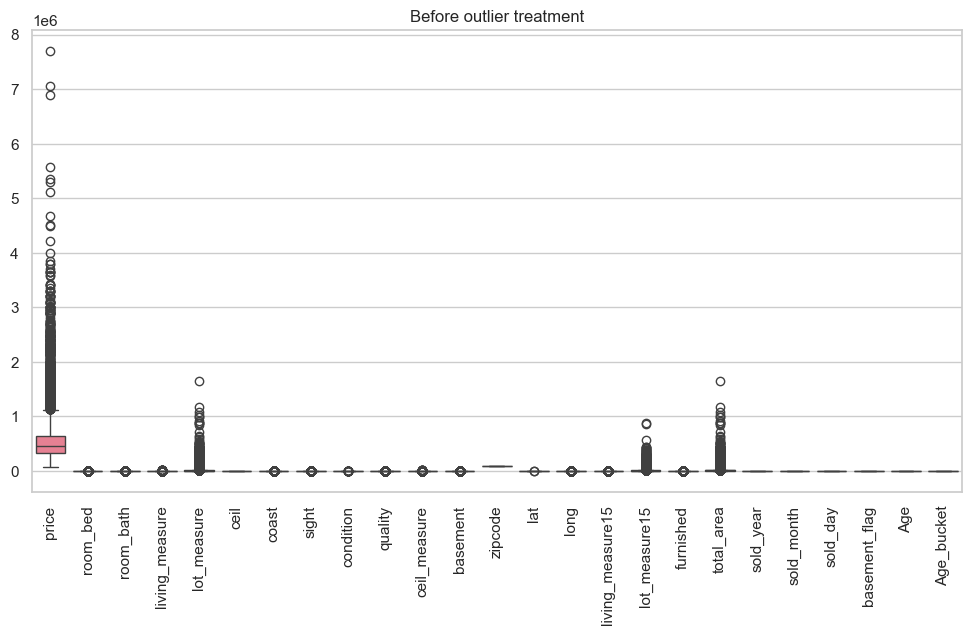

In [25]:
#Checking for outliers before treatment
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

# Create a boxplot of all columns
sns.boxplot(data=processing_data)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
plt.title('Before outlier treatment')
# Show the plot
plt.show()

In [26]:
# quantiles only for numeric columns
num = processing_data.select_dtypes(include='number')
outliers = num.quantile(0.97)
print(outliers)


price              1390000.00
room_bed                 5.00
room_bath                3.00
living_measure        4140.00
lot_measure          67378.54
ceil                     2.50
coast                    0.00
sight                    3.00
condition                5.00
quality                 10.00
ceil_measure          3700.90
basement              1340.00
zipcode              98188.00
lat                     47.76
long                  -121.90
living_measure15      3560.00
lot_measure15        51400.00
total_area           70320.71
sold_year             2015.00
sold_month              12.00
sold_day                30.00
basement_flag            1.00
Age                    105.00
Name: 0.97, dtype: float64


In [27]:
#Calculating the quantile range to exclude outliers
outliers = processing_data.quantile(0.97, numeric_only=True)


In [28]:
#Removing outliers as they are in the price, lot_measure, lot_measure15 and room_bed column
processing_data=processing_data[processing_data['price']<outliers['price']]
processing_data=processing_data[processing_data['lot_measure']<outliers['lot_measure']]
processing_data=processing_data[processing_data['lot_measure15']<outliers['lot_measure15']]

processing_data=processing_data[processing_data['room_bed']<15]


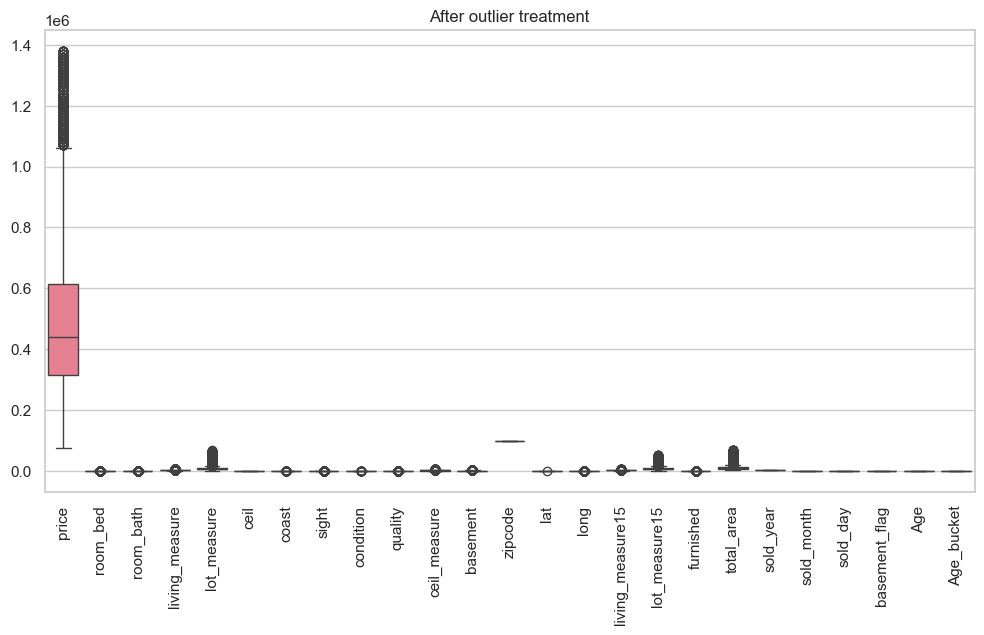

In [29]:
#Checking for outliers after treatment
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

# Create a boxplot of all columns
sns.boxplot(data=processing_data)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
plt.title('After outlier treatment')

# Show the plot
plt.show()

The dataset is out of outliers now

In [30]:
processed_data = processing_data

# **Data Visualization**

# Univariate Analysis

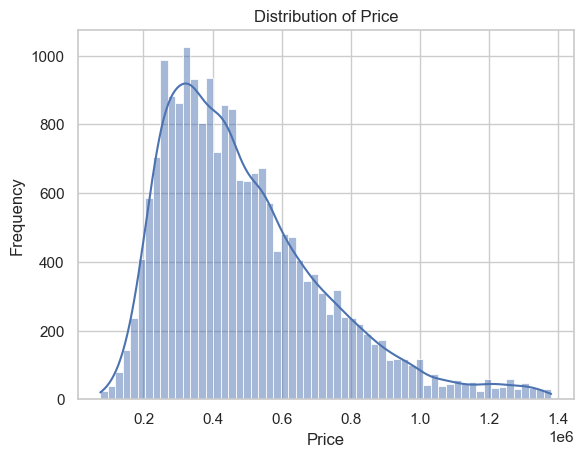

In [31]:
#target variable analysis of it's distribution
sns.histplot(data=processed_data, x='price', kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


The distribution of house prices shows a right-skewed pattern, indicating that most properties fall within lower to mid-price ranges, while a few high-value properties extend the tail.

Univariate analysis of continuous variables

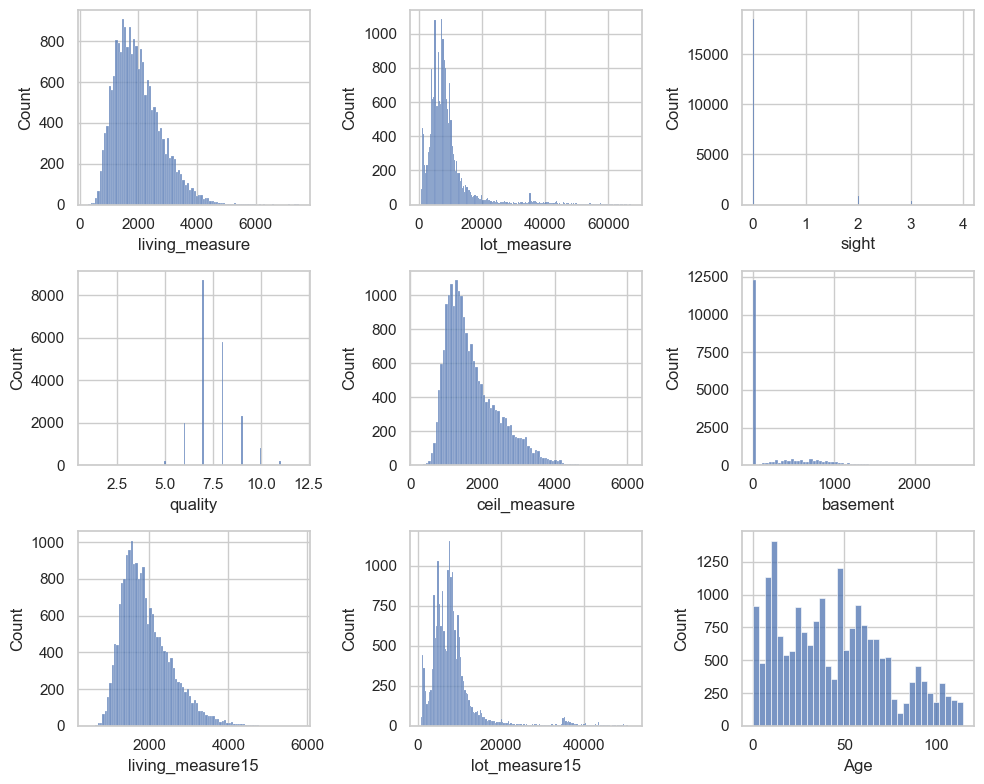

In [32]:
#for numerical variables
fig, axes = plt.subplots(3, 3, dpi=100, figsize=(10, 8))
# plt.figure(dpi=)

sns.histplot(ax=axes[0,0] , data=processed_data, x="living_measure")
sns.histplot(ax=axes[0,1] , data=processed_data, x="lot_measure")
sns.histplot(ax=axes[0,2] , data=processed_data, x="sight")
sns.histplot(ax=axes[1,0] , data=processed_data, x="quality")
sns.histplot(ax=axes[1,1] , data=processed_data, x="ceil_measure")
sns.histplot(ax=axes[1,2] , data=processed_data, x="basement")
sns.histplot(ax=axes[2,0] , data=processed_data, x="living_measure15")
sns.histplot(ax=axes[2,1] , data=processed_data, x="lot_measure15")
sns.histplot(ax=axes[2,2] , data=processed_data, x="Age")

fig.tight_layout()
plt.show()

In [ ]:
Most features such as living_measure, lot_measure, ceil_measure, 
and lot_measure15 are right-skewed — meaning most values lie on the lower end, with a few large observations.


'Most features such as living_measure, lot_measure, ceil_measure, \nand lot_measure15 are right-skewed — meaning most values lie on the lower end, with a few large observations.'

<Axes: xlabel='living_measure', ylabel='Count'>

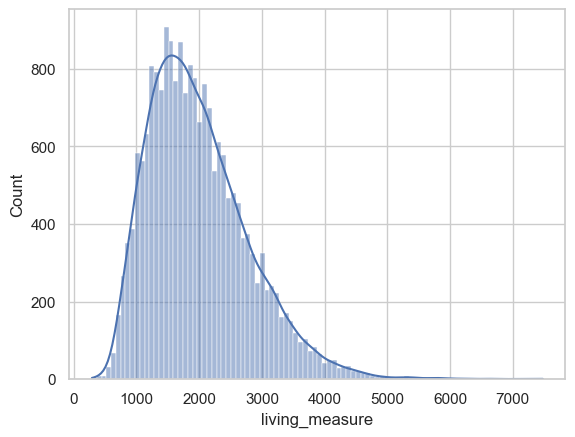

In [34]:
#Before log transformation the distribution of living_measure is slightly right skewed
sns.histplot(data=processed_data, x='living_measure', kde=True)

In [ ]:
The distribution shows a positive skew, with most properties having smaller living spaces and a few larger houses extending the right tail.
This imbalance suggests the need for log transformation to normalize the feature before modeling

'The distribution shows a positive skew, with most properties having smaller living spaces and a few larger houses extending the right tail.\nThis imbalance suggests the need for log transformation to normalize the feature before modeling'

Normally distributed living_measure


<Axes: xlabel='living_measure', ylabel='Count'>

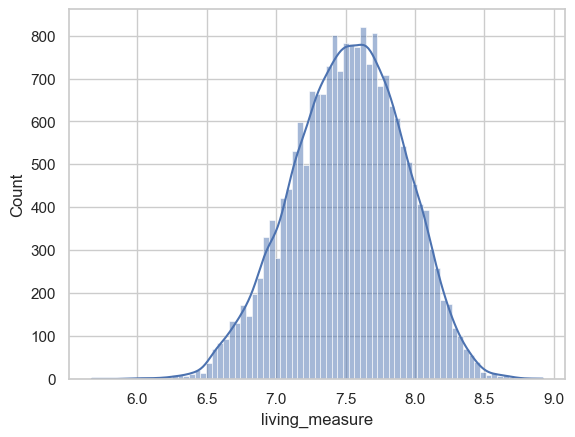

In [36]:
#After log transformation
processed_data['living_measure'] = np.log1p(processed_data['living_measure'])
print('Normally distributed living_measure')
sns.histplot(data=processed_data, x='living_measure', kde=True)


<Axes: xlabel='ceil_measure', ylabel='Count'>

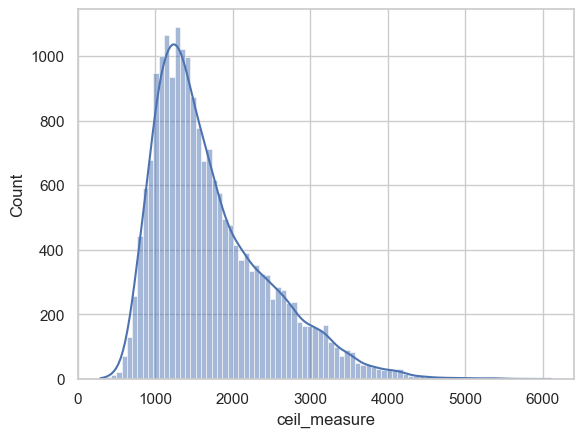

In [37]:
#Before log transformation the distribution of ceil_measure is slightly right skewed
sns.histplot(data=processed_data, x='ceil_measure', kde=True)

Normally distributed ceil_measure


<Axes: xlabel='ceil_measure', ylabel='Count'>

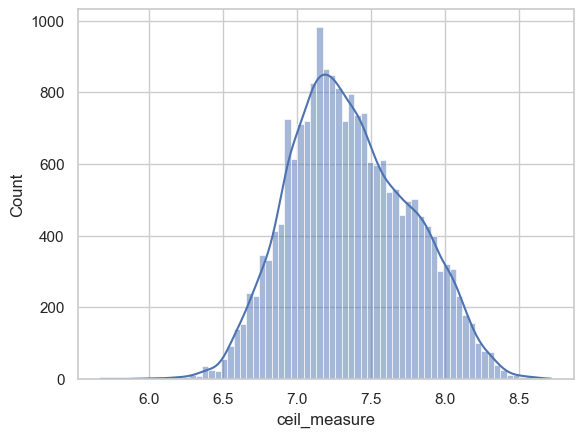

In [38]:
#After log transformation
processed_data['ceil_measure'] = np.log1p(processed_data['ceil_measure'])
print('Normally distributed ceil_measure')
sns.histplot(data=processed_data, x='ceil_measure', kde=True)


<Axes: xlabel='living_measure15', ylabel='Count'>

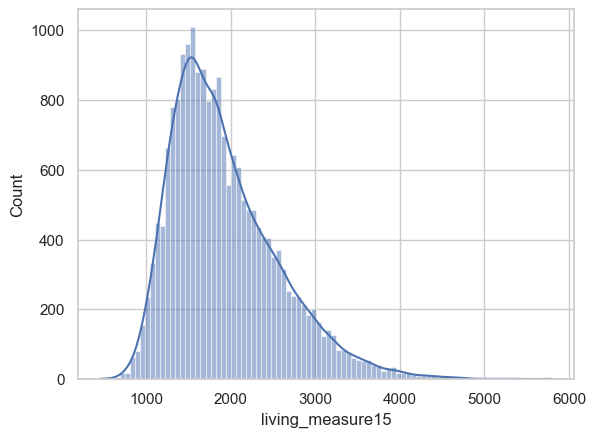

In [39]:
#Before log transformation the distribution of living_measure15 is slightly right skewed
sns.histplot(data=processed_data, x='living_measure15', kde=True)

Normally distributed living_measure15


<Axes: xlabel='living_measure15', ylabel='Count'>

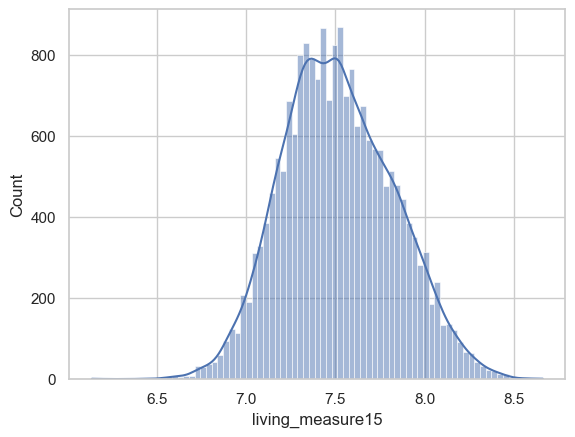

In [40]:
#After log transformation
processed_data['living_measure15'] = np.log1p(processed_data['living_measure15'])
print('Normally distributed living_measure15')
sns.histplot(data=processed_data, x='living_measure15', kde=True)


Univariate analysis of categorical variables

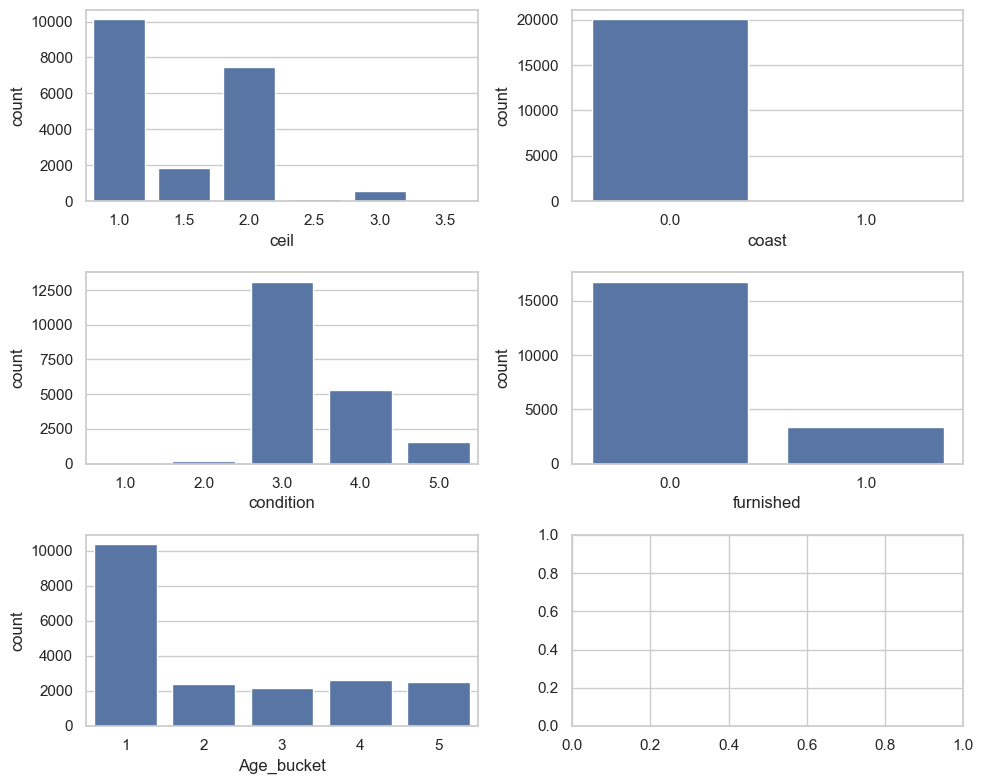

In [41]:
#for categorical variables
fig, axes = plt.subplots(3, 2, dpi=100, figsize=(10, 8))
# plt.figure(dpi=)

sns.countplot(ax=axes[0,0] , data=processed_data, x="ceil")
sns.countplot(ax=axes[0,1] , data=processed_data, x="coast")
sns.countplot(ax=axes[1,0] , data=processed_data, x="condition")
sns.countplot(ax=axes[1,1] , data=processed_data, x="furnished")
sns.countplot(ax=axes[2,0] , data=processed_data, x="Age_bucket")

fig.tight_layout()
plt.show()

Insights from the analysis:
1. Most houses have 1 or 2 floors, with a few having 3.    
2. Most of the houses are not from a coastal region.
3. Most of the houses have a condition rating of 3 (average condition), followed by condition 4 (good).
4. Majority of the houses are not furnished.
5. Majority of the houses were built within the last 10 years (Age bucket 1).



## Bivariate analysis

Bivariate analysis of numerical features

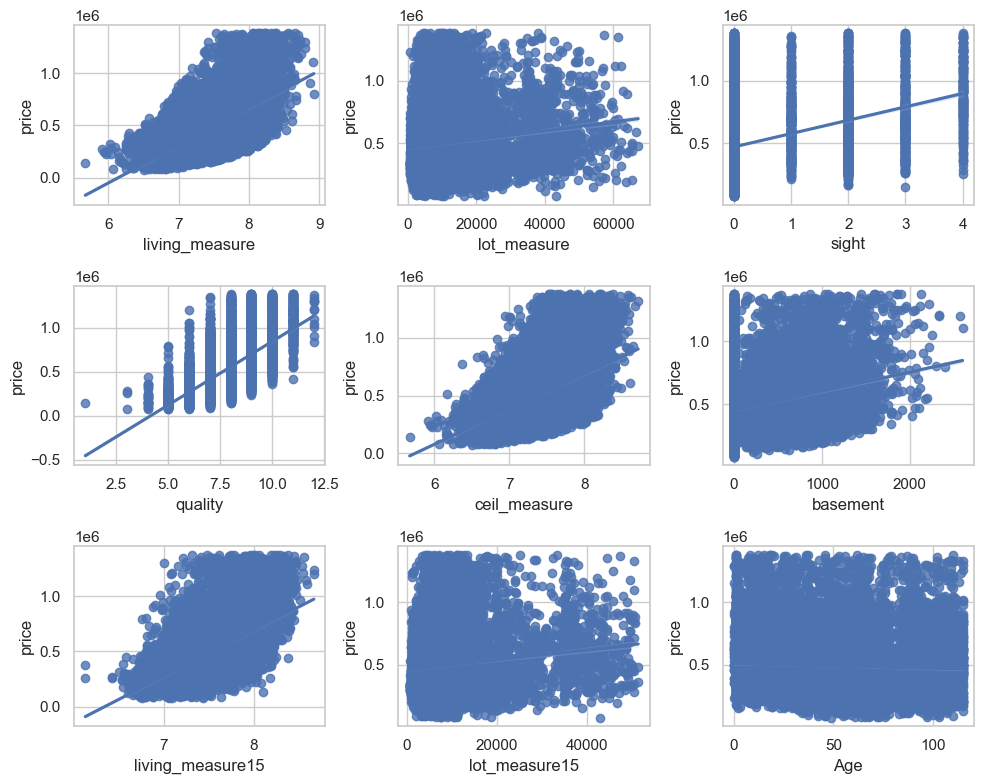

In [42]:
#Bivariate analysis of numerical variables vs Price

fig, axes = plt.subplots(3, 3, dpi=100, figsize=(10, 8))
# plt.figure(dpi=)

sns.regplot(ax=axes[0,0] , data=processed_data, x="living_measure", y="price")
sns.regplot(ax=axes[0,1] , data=processed_data, x="lot_measure", y="price")
sns.regplot(ax=axes[0,2] , data=processed_data, x="sight", y="price")
sns.regplot(ax=axes[1,0] , data=processed_data, x="quality", y="price")
sns.regplot(ax=axes[1,1] , data=processed_data, x="ceil_measure", y="price")
sns.regplot(ax=axes[1,2] , data=processed_data, x="basement", y="price")
sns.regplot(ax=axes[2,0] , data=processed_data, x="living_measure15", y="price")
sns.regplot(ax=axes[2,1] , data=processed_data, x="lot_measure15", y="price")
sns.regplot(ax=axes[2,2] , data=processed_data, x="Age", y="price")

fig.tight_layout()
plt.show()

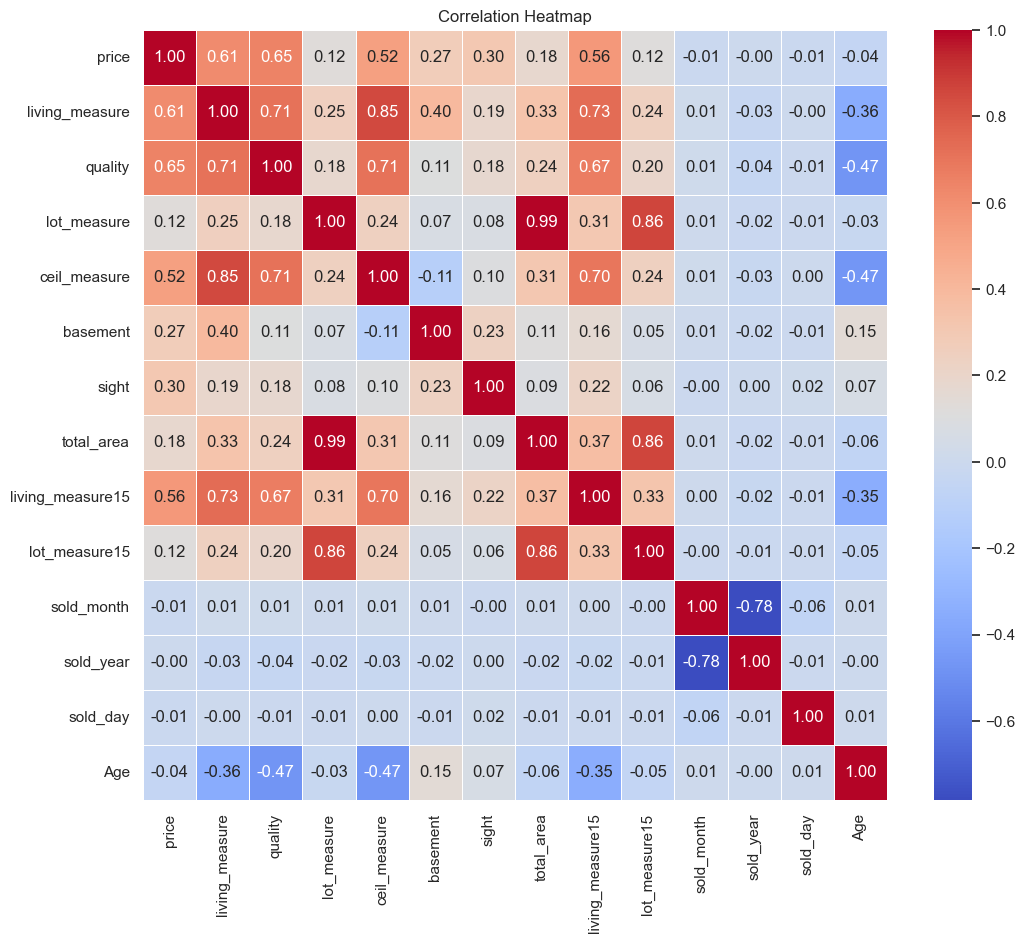

In [43]:
## Correlation Heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed, 'lat
heatmap_features = ['price', 'living_measure', 'quality', 'lot_measure', 'ceil_measure', 'basement', 'sight', 'total_area',
                     'living_measure15', 'lot_measure15', 'sold_month', 'sold_year', 'sold_day', 'Age']
sns.heatmap(processed_data[heatmap_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# price Type Conversion  
processed_data['price'] = (
    processed_data['price']
      .astype(str)
      .str.replace(r'[\$,]', '', regex=True)
      .replace('', np.nan)
      .pipe(pd.to_numeric, errors='coerce')
)

In [45]:
# detect object columns that look numeric (optionally with $ and ,)
cand = []
for c in processed_data.columns:
    if processed_data[c].dtype == 'object':
        s = processed_data[c].astype(str).str.strip()
        if s.str.fullmatch(r'\$?\d{1,3}(,\d{3})*(\.\d+)?|\$?\d+(\.\d+)?').fillna(False).all():
            cand.append(c)


processed_data[cand] = (processed_data[cand]
                        .replace(r'[\$,]', '', regex=True)
                        .replace('', np.nan)
                        .apply(pd.to_numeric, errors='coerce'))


In [ ]:
## Calculating variables with the strongest positive or negative impact on house prices.
corr_to_price = processed_data.corr(numeric_only=True)['price'].sort_values(ascending=False)
print(corr_to_price)


price               1.00
quality             0.65
living_measure      0.61
living_measure15    0.56
furnished           0.55
ceil_measure        0.52
room_bath           0.43
lat                 0.42
room_bed            0.31
sight               0.30
ceil                0.27
basement            0.27
basement_flag       0.19
total_area          0.18
Age_bucket          0.13
lot_measure         0.12
lot_measure15       0.12
coast               0.08
condition           0.04
long                0.04
sold_year          -0.00
sold_month         -0.01
sold_day           -0.01
zipcode            -0.02
Age                -0.04
Name: price, dtype: float64


In [47]:
print(processed_data['price'].head(10))
print(processed_data['price'].isna().mean(), 'fraction NaN in price')


0     600000
1     190000
2     735000
3     257000
4     450000
5     245000
6     466000
7    1160000
8     449950
9     299950
Name: price, dtype: int64
0.0 fraction NaN in price


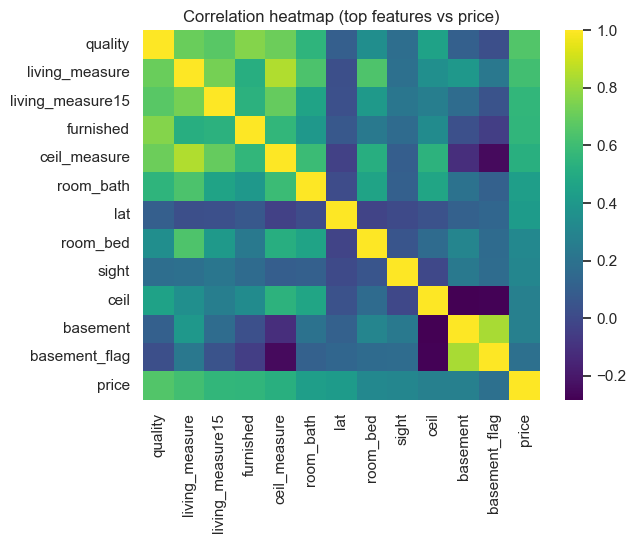

In [ ]:
## Heatmap of top correlations with Price
top_feats = corr_to_price.drop('price').abs().nlargest(12).index.tolist()
sns.heatmap(processed_data[top_feats + ['price']].corr(numeric_only=True), annot=False, cmap='viridis')
plt.title('Correlation heatmap (top features vs price)')
plt.show()


Insights from the heat map of correlations:

features such as quality, living_measure, ceil_measure, and furnished have strong positive correlations with house prices. This suggests that larger, higher-quality, and furnished homes tend to command higher prices. variables like living_measure and living_measure15 are highly correlated with each other, indicating potential redundancy


### Bivariate analysis for categorical variables

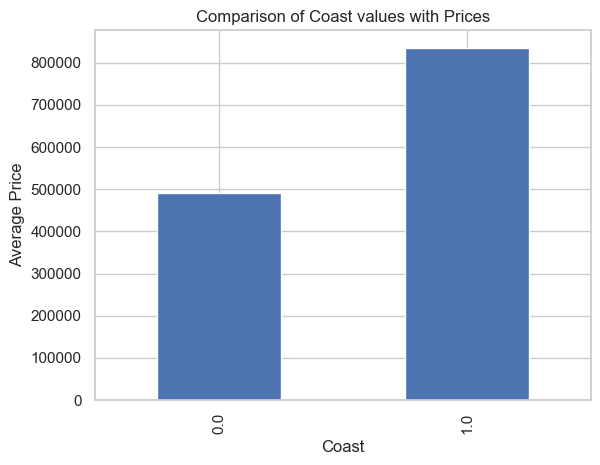

In [ ]:
#Bivariate analysis of coast vs price

# Group the data by 'coast' column and calculate the average price
grouped_data_coast = processed_data.groupby('coast')['price'].mean()

# Create the chart
fig, ax = plt.subplots()
grouped_data_coast.plot(kind='bar', ax=ax)
# ax.set_xticklabels(['Not a coastal region', 'Coastal region'])
ax.set_ylabel('Average Price')
ax.set_xlabel('Coast')
ax.set_title('Comparison of Coast values with Prices')
plt.show()


Houses near the coast are much more expensive, likely due to premium location, scenic views, and higher demand

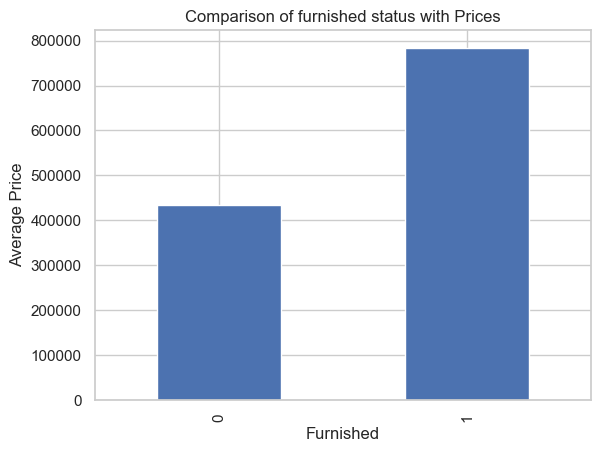

In [50]:
#Bivariate analysis of coast vs price


# Group the data by 'furnished' column and calculate the average price
grouped_data_furnished = processed_data.groupby('furnished')['price'].mean()

# Create the chart
fig, ax = plt.subplots()
grouped_data_furnished.plot(kind='bar', ax=ax)
ax.set_ylabel('Average Price')
ax.set_xticklabels(['0', '1'])

ax.set_xlabel('Furnished')
ax.set_title('Comparison of furnished status with Prices')
plt.show()


Fully or semi-furnished homes attract higher prices due to convenience. The furnished feature is a strong categorical variable that positively correlates with price. 

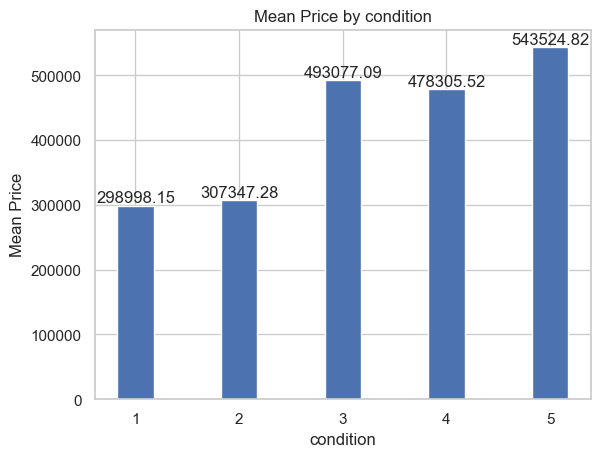

In [51]:
#Bivariate analysis of condition vs price


# Calculate the mean price for each condition
mean_price_by_condition = processed_data.groupby('condition')['price'].mean()

# # Create a grouped bar plot
conditions = mean_price_by_condition.index
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(conditions, mean_price_by_condition, width)

ax.set_xlabel('condition')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Price by condition')
# ax.set_xticks(conditions)
# ax.set_xticklabels(conditions)

ax.bar_label(rects, fmt='%.2f', label_type='edge')

plt.show()

The relationship between house condition and price indicates that properties in better physical condition command higher prices. The average price increases progressively from poor to excellent condition,

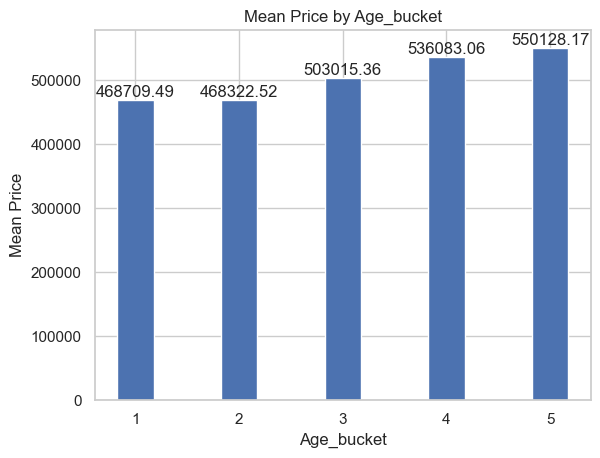

In [52]:
#Bivariate analysis of Age_bucket vs price

# Calculate the mean price for each condition
mean_price_by_age_bucket = processed_data.groupby('Age_bucket')['price'].mean()

# # Create a grouped bar plot
conditions = mean_price_by_age_bucket.index
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(conditions, mean_price_by_age_bucket, width)

ax.set_xlabel('Age_bucket')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Price by Age_bucket')

ax.bar_label(rects, fmt='%.2f', label_type='edge')

plt.show()

Surprisingly, Age_bucket feature shows that older homes tend to have higher average prices compared to newer ones. his counterintuitive pattern suggests that older properties may be situated in more desirable areas, built with larger spaces, or renovated over time, enhancing their value.


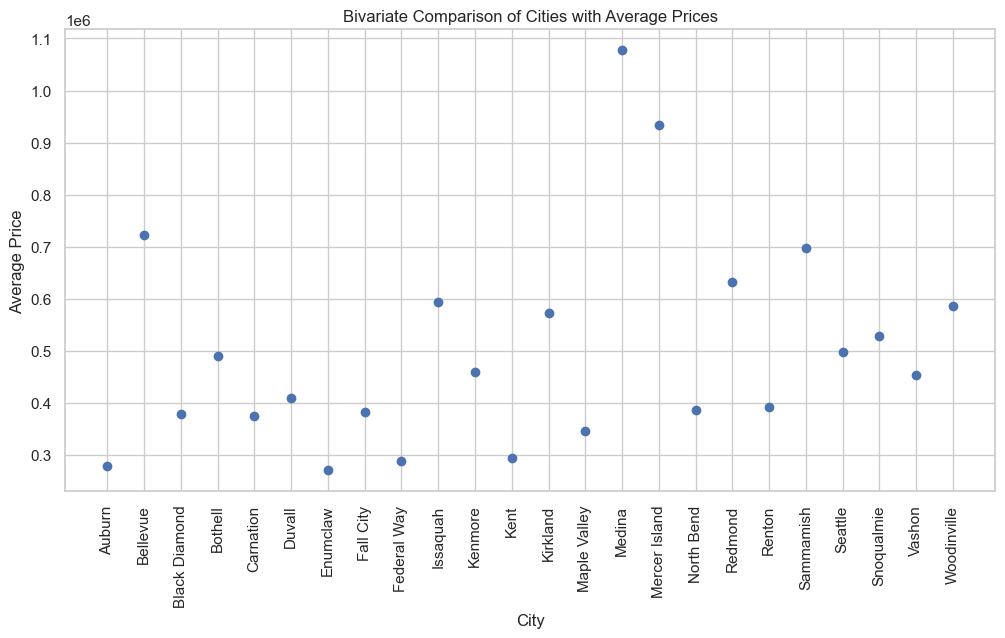

In [ ]:
#Bivariate analysis of city vs price

# Group the data by 'city' and calculate the average price
grouped_data_city = processed_data.groupby('City')['price'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(grouped_data_city.index, grouped_data_city.values)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Average Price')
plt.title('Bivariate Comparison of Cities with Average Prices')
plt.show()


Cities such as Medina, Bellevue, and Mercer Island show the highest average housing prices, reflecting their premium status and urban amenities. Meanwhile, areas like Auburn and Federal Way have relatively affordable housing, suggesting potential growth markets. This clearly demonstrates that location plays a crucial role in determining property value.

# **Future tuning and encoding**

Label encoding

In [54]:
#label encoding
label_encoder = LabelEncoder()
label_Features = ['coast', 'condition', 'sold_date', 'Age_bucket', 'furnished', 'ceil']

for i in label_Features:
  processed_data[i] = label_encoder.fit_transform(processed_data[i])
processed_data[label_Features]

,coast,condition,sold_date,Age_bucket,furnished,ceil
0,0,2,323,0,0,0
1,0,3,203,0,0,0
2,1,2,243,0,0,2
3,0,2,122,4,0,2
4,0,2,213,0,0,0
...,...,...,...,...,...,...
21608,0,2,114,3,1,2
21609,0,2,252,0,0,0
21610,0,2,57,1,1,2
21611,0,2,62,3,0,2


One hot encoding of city and zipcode column

In [55]:
X = processed_data.drop('price', axis=1)
X = pd.get_dummies(X, columns = ['zipcode', 'City'])

In [56]:
y = processed_data['price']

## Scaling of features

In [57]:
scaler = MinMaxScaler()

In [58]:
#Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [59]:

from sklearn.preprocessing import StandardScaler  # or MinMaxScaler
scaler = StandardScaler()

# 1) remove $/commas from object columns, then try to cast to numbers
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = (X_train[col].astype(str)
                                   .str.replace(r'[\$,]', '', regex=True))
        X_train[col] = pd.to_numeric(X_train[col], errors='ignore')

for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = (X_test[col].astype(str)
                                  .str.replace(r'[\$,]', '', regex=True))
        X_test[col] = pd.to_numeric(X_test[col], errors='ignore')

# 2) keep only numeric features for scaling
num_cols = X_train.select_dtypes(include='number').columns

# 3) scale
x_train = scaler.fit_transform(X_train[num_cols])
x_test  = scaler.transform(X_test[num_cols])


In [117]:
# Building an end-to-end ML pipeline that:
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import numpy as np

# Identify numeric and categorical columns automatically
num_sel = make_column_selector(dtype_include=np.number)
cat_sel = make_column_selector(dtype_include=object)

preprocess = ColumnTransformer([
    ('num', Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ]), num_sel),
    ('cat', Pipeline([
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_sel)
])

pipe = Pipeline([
    ('prep', preprocess),
    ('model', LinearRegression())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


In [61]:
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Select columns by data type
num_sel = make_column_selector(dtype_include=np.number)
cat_sel = make_column_selector(dtype_include=object)

# Build preprocessing pipeline
preprocess = ColumnTransformer([
    ('num', Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ]), num_sel),
    ('cat', Pipeline([
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_sel)
])

# Build full pipeline with model
pipe = Pipeline([
    ('prep', preprocess),
    ('model', LinearRegression())
])

# ✅ Fit model
pipe.fit(X_train, y_train)

# ✅ Predict on test data
lr_pred_test = pipe.predict(X_test)

# ✅ Calculate R² and RMSE
lr_r2_score_test = r2_score(y_test, lr_pred_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred_test))

# ✅ Adjusted R² calculation
n = len(y_test)
p = X_test.shape[1]
lr_adj_r2_score_test = 1 - (1 - lr_r2_score_test) * ((n - 1) / (n - p - 1))

print("R² Score:", lr_r2_score_test)
print("Adjusted R² Score:", lr_adj_r2_score_test)
print("RMSE:", lr_rmse)


R² Score: 0.7226337039036139
Adjusted R² Score: 0.7140348512703414
RMSE: 125621.94733064514


In [62]:
print(X_train.isna().sum().sort_values(ascending=False).head(15))


dayhours            0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
lat                 0
long                0
living_measure15    0
dtype: int64


In [63]:
from sklearn.impute import SimpleImputer

Xn_train = X_train.select_dtypes(include=np.number)
Xn_test  = X_test.select_dtypes(include=np.number)

imp = SimpleImputer(strategy='median')
Xn_train = imp.fit_transform(Xn_train)
Xn_test  = imp.transform(Xn_test)

lr = LinearRegression()
lr.fit(Xn_train, y_train)
y_pred = lr.predict(Xn_test)


In [64]:
# #scaling the features
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)




# **Model building**

### Linear Regression

In [65]:
#Creating the object for the Linear Regression model
lr=LinearRegression()

In [66]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imp = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

X_train_imp = scaler.fit_transform(imp.fit_transform(X_train_num))
X_test_imp = scaler.transform(imp.transform(X_test_num))

lr = LinearRegression()
lr.fit(X_train_imp, y_train)
lr_pred_test = lr.predict(X_test_imp)


In [67]:
#predicting with the  pipeline
lr_pred_test = pipe.predict(X_test)


In [68]:
#Calculating the r2_score and RMSE for test data
lr_r2_score_test = r2_score(y_test, lr_pred_test)
lr_adj_r2_score_test = adjusted_r2_score(y_test, lr_pred_test, 118)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred_test))

In [69]:
#Printing the r2_score and RMSE for test data
print(f"Linear Regression R squared test score: {lr_r2_score_test}")
print(f"Linear Regression Adjusted R squared score: {lr_adj_r2_score_test}")
print(f"Linear Regression RMSE: {lr_rmse}")


Linear Regression R squared test score: 0.7226337039036139
Linear Regression Adjusted R squared score: 0.7142544865612244
Linear Regression RMSE: 125621.94733064514


In [70]:
#Cross validating
from sklearn.model_selection import KFold, cross_val_score, cross_validate

# Use the same 'pipe' you fitted earlier (prep + LinearRegression)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# R² only
cv_r2 = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='r2')
print("CV R²:", cv_r2)
print("CV R² mean:", cv_r2.mean(), "±", cv_r2.std())

# R² and RMSE together
cv_res = cross_validate(
    pipe,
    X_train, y_train,
    cv=kfold,
    scoring={'r2':'r2', 'rmse':'neg_root_mean_squared_error'},
    return_train_score=False
)
print("CV R² mean:", cv_res['test_r2'].mean())
print("CV RMSE mean:", -cv_res['test_rmse'].mean())  # negate because sklearn returns negative RMSE


CV R²: [0.69702246 0.70037613 0.6938223  0.70567482 0.70714868]
CV R² mean: 0.7008088762096174 ± 0.005043945627717106
CV R² mean: 0.7008088762096174
CV RMSE mean: 128630.31317453666


### Decision Tree

In [71]:
#Creating an object of the DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=4)

In [72]:
#Fitting the train data into the model
DTR.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [73]:
#predicting with the x_test
dtr_pred = DTR.predict(x_test)

In [74]:
#Calculating the r2_score and RMSE
dtr_r2_score = r2_score(y_test, dtr_pred)
dtr_adj_r2_score = adjusted_r2_score(y_test, dtr_pred, 118)
dtr_rmse = np.sqrt(mean_squared_error(y_test, dtr_pred))

In [75]:
#Printing the r2_score and RMSE
print(f"Decision Tree Regression R squared test score: {dtr_r2_score}")
print(f"Decision Tree Regression Adjusted R squared test score: {dtr_adj_r2_score}")
print(f"Decision Tree Regression RMSE: {dtr_rmse}")


Decision Tree Regression R squared test score: 0.6846073265603401
Decision Tree Regression Adjusted R squared test score: 0.6750793348896078
Decision Tree Regression RMSE: 133956.71166403254


In [76]:
#Cross validating
k_folds = KFold(n_splits = 5)
scores = cross_val_score(DTR, x_train, y_train, cv = k_folds)

print("Cross Validation Scores (Decision Tree): ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores (Decision Tree):  [0.69309842 0.67977301 0.65946618 0.65607487 0.67744377]
Average CV Score:  0.6731712512172694
Number of CV Scores used in Average:  5


## Ridge Regression

In [77]:
#Creating an object of the Ridge Regressor
RGR = Ridge()

In [78]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# selectors
num_sel = make_column_selector(dtype_include=np.number)
cat_sel = make_column_selector(dtype_include=object)

# preprocessing
preprocess = ColumnTransformer([
    ('num', Pipeline([
        ('imp', SimpleImputer(strategy='median')),
        ('sc', StandardScaler()),
    ]), num_sel),
    ('cat', Pipeline([
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('oh', OneHotEncoder(handle_unknown='ignore')),
    ]), cat_sel),
])

# Ridge pipeline
pipe_ridge = Pipeline([
    ('prep', preprocess),
    ('model', Ridge())      # alpha will be tuned below (optional)
])

# fit & predict
pipe_ridge.fit(X_train, y_train)
ridge_pred = pipe_ridge.predict(X_test)

# scores
r2  = r2_score(y_test, ridge_pred)
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print("R²:", r2, "RMSE:", rmse)



R²: 0.7233919422076495 RMSE: 125450.12299561965


In [79]:
#Fitting the train data into the model

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(pipe_ridge, X_train, y_train, cv=cv, scoring='r2')
print("CV R² mean:", cv_r2.mean(), "±", cv_r2.std())


CV R² mean: 0.7023351994013497 ± 0.005092550283886712


In [80]:
#predicting with the x_test
ridge_pred = pipe_ridge.predict(X_test)


In [81]:
#Calculating the r2_score and RMSE


#  Predict using the pipeline (not RGR)
ridge_pred = pipe_ridge.predict(X_test)

#  Calculate metrics
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

# Optional: Adjusted R²
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    return 1 - (1 - r2) * (n - 1) / (n - n_features - 1)

ridge_adj_r2 = adjusted_r2_score(y_test, ridge_pred, X_test.shape[1])

print("R²:", ridge_r2)
print("Adjusted R²:", ridge_adj_r2)
print("RMSE:", ridge_rmse)


R²: 0.7233919422076495
Adjusted R²: 0.7148165963216966
RMSE: 125450.12299561965


In [82]:
# Printing the Ridge Regression performance
print(f"Ridge Regression R² Score: {ridge_r2:.4f}")
print(f"Ridge Regression Adjusted R² Score: {ridge_adj_r2:.4f}")
print(f"Ridge Regression RMSE: {ridge_rmse:.2f}")


Ridge Regression R² Score: 0.7234
Ridge Regression Adjusted R² Score: 0.7148
Ridge Regression RMSE: 125450.12


In [83]:
#Cross validating


k_folds = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pipe_ridge, X_train, y_train, cv=k_folds, scoring='r2')

print("Cross-Validation Scores (Ridge Regression):", cv_scores)
print("Average CV Score:", cv_scores.mean())
print("Number of CV Scores used in Average:", len(cv_scores))


Cross-Validation Scores (Ridge Regression): [0.69814264 0.70156628 0.69569104 0.70806265 0.70821338]
Average CV Score: 0.7023351994013497
Number of CV Scores used in Average: 5


## XGB Regressor

In [84]:
#Creating an object of the XGB Regressor
XGB = XGBRegressor()

In [85]:
#Fitting the train data into the model
XGB.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [86]:
#predicting with the x_test
xgb_pred = XGB.predict(x_test)

In [87]:
#Calculating the r2_score and RMSE
xgb_r2_score = r2_score(y_test, xgb_pred)
xgb_adj_r2_score = adjusted_r2_score(y_test, xgb_pred, 118)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

In [88]:
#Printing the r2_score and RMSE
print(f"XGB Regression R squared test score: {xgb_r2_score}")
print(f"XGB Regression Adjusted R squared test score: {xgb_adj_r2_score}")
print(f"XGB Regression RMSE: {xgb_rmse}")


XGB Regression R squared test score: 0.8795639872550964
XGB Regression Adjusted R squared test score: 0.875925623326807
XGB Regression RMSE: 82778.36548277576


In [89]:
#Cross validating
k_folds = KFold(n_splits = 5)
scores = cross_val_score(XGB, x_train, y_train, cv = k_folds)

print("Cross Validation Scores (XGB Regressor): ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores (XGB Regressor):  [0.8856796  0.86525565 0.8711763  0.86324084 0.87674111]
Average CV Score:  0.8724187016487122
Number of CV Scores used in Average:  5


## Light GBM Regressor

In [90]:
#Creating an object of the LGBM Regressor
LGBM =  lgb.LGBMRegressor()

In [91]:
#Fitting the train data into the model
LGBM.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2709
[LightGBM] [Info] Number of data points in the train set: 16099, number of used features: 24
[LightGBM] [Info] Start training from score 491602.196099


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [92]:
#predicting with the x_test
lgbm_pred = LGBM.predict(x_test)

In [93]:
#Calculating the r2_score and RMSE
lgbm_r2_score = r2_score(y_test, lgbm_pred)
lgbm_adj_r2_score = adjusted_r2_score(y_test, lgbm_pred, 118)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_pred))

In [94]:
#Printing the r2_score and RMSE
print(f"LGBM Regression R squared test score: {lgbm_r2_score}")
print(f"LGBM Regression Adjusted R squared test score: {lgbm_adj_r2_score}")
print(f"LGBM Regression RMSE: {lgbm_rmse}")


LGBM Regression R squared test score: 0.8851869017212184
LGBM Regression Adjusted R squared test score: 0.8817184056646653
LGBM Regression RMSE: 80822.8938401693


In [95]:
#Cross validating
k_folds = KFold(n_splits = 5)
scores = cross_val_score(LGBM, x_train, y_train, cv = k_folds)

print("Cross Validation Scores (LGBM Regressor): ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2697
[LightGBM] [Info] Number of data points in the train set: 12879, number of used features: 24
[LightGBM] [Info] Start training from score 491145.587002
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2698
[LightGBM] [Info] Number of data points in the train set: 12879, number of used features: 24
[LightGBM] [Info] Start training from score 491842.687553
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2700
[LightGBM] [Info] Number of data points in the train set: 12879, number of used features: 24
[LightGBM] [Info]

## Cat Boost Regressor

In [96]:

#Creating an object of the Cat Boost Regressor
CB = cb.CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE')

In [97]:
#Fitting the train data into the model
CB.fit(x_train, y_train)

0:	learn: 219782.5451362	total: 171ms	remaining: 2m 50s
1:	learn: 206120.9948025	total: 184ms	remaining: 1m 31s
2:	learn: 194129.4355093	total: 197ms	remaining: 1m 5s
3:	learn: 183344.3329050	total: 208ms	remaining: 51.8s
4:	learn: 174232.9638189	total: 222ms	remaining: 44.2s
5:	learn: 165853.3017058	total: 233ms	remaining: 38.6s
6:	learn: 158666.1243323	total: 244ms	remaining: 34.7s
7:	learn: 152609.2747610	total: 252ms	remaining: 31.2s
8:	learn: 146690.1150919	total: 260ms	remaining: 28.6s
9:	learn: 141411.0629449	total: 268ms	remaining: 26.5s
10:	learn: 136657.0296244	total: 273ms	remaining: 24.6s
11:	learn: 132259.4374315	total: 283ms	remaining: 23.3s
12:	learn: 128581.7446528	total: 289ms	remaining: 21.9s
13:	learn: 124786.5812112	total: 297ms	remaining: 20.9s
14:	learn: 121880.4103696	total: 302ms	remaining: 19.9s
15:	learn: 118771.2669297	total: 309ms	remaining: 19s
16:	learn: 116390.1520703	total: 316ms	remaining: 18.3s
17:	learn: 114018.2435161	total: 323ms	remaining: 17.6s
18

In [98]:
#predicting with the x_test
cb_pred = CB.predict(x_test)

In [99]:
#Calculating the r2_score and RMSE
cb_r2_score = r2_score(y_test, cb_pred)
cb_adj_r2_score = adjusted_r2_score(y_test, cb_pred, 118)
cb_rmse = np.sqrt(mean_squared_error(y_test, cb_pred))

In [100]:
#Printing the r2_score and RMSE
print(f"Cat Boost Regression R2 test score: {cb_r2_score}")
print(f"Cat Boost Regression Adjusted R squared test score: {cb_adj_r2_score}")
print(f"Cat Boost RMSE: {cb_rmse}")


Cat Boost Regression R2 test score: 0.896855645783453
Cat Boost Regression Adjusted R squared test score: 0.8937396617082988
Cat Boost RMSE: 76605.75697143671


In [101]:
#Cross validating
k_folds = KFold(n_splits = 5)
scores = cross_val_score(CB, x_train, y_train, cv = k_folds)

print("Cross Validation Scores (Cat Boost Regressor): ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

0:	learn: 219616.8499193	total: 7.09ms	remaining: 7.08s
1:	learn: 206774.5071837	total: 13.5ms	remaining: 6.74s
2:	learn: 194889.2991972	total: 19.6ms	remaining: 6.51s
3:	learn: 184084.5755165	total: 24.8ms	remaining: 6.18s
4:	learn: 175015.5838257	total: 30.5ms	remaining: 6.06s
5:	learn: 166653.9533274	total: 36.9ms	remaining: 6.11s
6:	learn: 159628.8144118	total: 43.5ms	remaining: 6.17s
7:	learn: 153173.6079111	total: 50.7ms	remaining: 6.29s
8:	learn: 147525.9812055	total: 58.2ms	remaining: 6.41s
9:	learn: 142304.3720963	total: 64.9ms	remaining: 6.43s
10:	learn: 137830.0806167	total: 71.4ms	remaining: 6.42s
11:	learn: 133746.0081856	total: 77.9ms	remaining: 6.41s
12:	learn: 129800.7817135	total: 83.1ms	remaining: 6.31s
13:	learn: 126770.0284298	total: 89.4ms	remaining: 6.29s
14:	learn: 123443.4499909	total: 95.7ms	remaining: 6.29s
15:	learn: 120159.6564739	total: 102ms	remaining: 6.29s
16:	learn: 117951.2181757	total: 107ms	remaining: 6.2s
17:	learn: 115152.7392176	total: 112ms	remai

## Model comparisons

In [102]:

def algo_test(x,y):

    L = LinearRegression()
    R = Ridge()
    XGBC= XGBRegressor()
    LGBM = lgb.LGBMRegressor()
    CB = cb.CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE')
    DTR = DecisionTreeRegressor(max_depth=4)


    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    algos = [L,R,XGBC, LGBM, CB, DTR]
    algo_names = ['Linear','Ridge','XGradientBooting', 'Light GBM', 'Cat Boost', 'Decision Tree']
    train_r_squared = []
    test_r_squared = []
    train_rmse = []
    test_rmse = []
    train_mae = []
    test_mae = []

    result = pd.DataFrame(columns = ['Train_R_Squared','Test_R_Squared','Train_RMSE','Test_RMSE','Train_MAE', 'Test_MAE'],index = algo_names)

    for algo in algos:
        algo.fit(x_train,y_train)
        train_r_squared.append(r2_score(y_train,algo.predict(x_train)))
        test_r_squared.append(r2_score(y_test,algo.predict(x_test)))
        train_rmse.append(mean_squared_error(y_train, algo.predict(x_train))**.5)
        test_rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        train_mae.append(mean_absolute_error(y_train, algo.predict(x_train)))
        test_mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.Train_R_Squared = train_r_squared
    result.Test_R_Squared = test_r_squared
    result.Train_RMSE = train_rmse
    result.Test_RMSE = test_rmse
    result.Train_MAE= train_mae
    result.Test_MAE= test_mae

    return result.sort_values('Test_R_Squared', ascending=False)


In [103]:
def algo_test(X, y):
    import numpy as np
    import pandas as pd

    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    from sklearn.compose import ColumnTransformer, make_column_selector
    from sklearn.preprocessing import OneHotEncoder, StandardScaler
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline
    from sklearn.linear_model import LinearRegression, Ridge
    from sklearn.tree import DecisionTreeRegressor

    # ---- basic sanity: drop rows with missing target
    XY = pd.concat([X, y], axis=1)
    XY = XY.dropna(subset=[y.name if hasattr(y, "name") and y.name else 'target'])
    if not hasattr(y, "name") or y.name is None:
        y_col = 'target'
        # if unnamed Series, give it a name
        if isinstance(y, pd.Series):
            y = y.rename(y_col)
        else:
            raise ValueError("y must be a pandas Series with a name.")
    else:
        y_col = y.name
    X = XY.drop(columns=[y_col])
    y = XY[y_col]

    # ---- selectors
    num_sel = make_column_selector(dtype_include=np.number)
    cat_sel = make_column_selector(dtype_include=object)

    # Preprocess for linear-like models (impute + scale + one-hot)
    preprocess_linear = ColumnTransformer([
        ('num', Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('sc', StandardScaler())
        ]), num_sel),
        ('cat', Pipeline([
            ('imp', SimpleImputer(strategy='most_frequent')),
            ('oh', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_sel)
    ])

    # Preprocess for tree/boosting models (no scaling needed)
    preprocess_tree = ColumnTransformer([
        ('num', SimpleImputer(strategy='median'), num_sel),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_sel)
    ])

    # ---- build model list, skipping unavailable libs
    algos = []
    names = []

    # Linear
    algos.append(Pipeline([('prep', preprocess_linear), ('model', LinearRegression())]))
    names.append('Linear')

    # Ridge
    algos.append(Pipeline([('prep', preprocess_linear), ('model', Ridge())]))
    names.append('Ridge')

    # XGBoost (optional)
    try:
        from xgboost import XGBRegressor
        algos.append(Pipeline([('prep', preprocess_tree),
                               ('model', XGBRegressor(
                                   n_estimators=500, learning_rate=0.05,
                                   max_depth=6, subsample=0.8, colsample_bytree=0.8,
                                   reg_lambda=1.0, random_state=42, n_jobs=-1
                               ))]))
        names.append('XGBoost')
    except Exception as e:
        pass  # XGBoost not installed or other issue

    # LightGBM (optional)
    try:
        import lightgbm as lgb
        algos.append(Pipeline([('prep', preprocess_tree),
                               ('model', lgb.LGBMRegressor(
                                   n_estimators=800, learning_rate=0.05,
                                   num_leaves=31, subsample=0.8, colsample_bytree=0.8,
                                   reg_lambda=1.0, random_state=42
                               ))]))
        names.append('LightGBM')
    except Exception as e:
        pass  # LightGBM not installed

    # CatBoost (optional)
    try:
        import catboost as cb
        algos.append(Pipeline([('prep', preprocess_tree),
                               ('model', cb.CatBoostRegressor(
                                   iterations=800, learning_rate=0.05, depth=6,
                                   loss_function='RMSE', verbose=False, random_state=42
                               ))]))
        names.append('CatBoost')
    except Exception as e:
        pass  # CatBoost not installed

    # Decision Tree
    algos.append(Pipeline([('prep', preprocess_tree),
                           ('model', DecisionTreeRegressor(max_depth=6, random_state=42))]))
    names.append('Decision Tree')

    # ---- split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    rows = []
    for name, algo in zip(names, algos):
        try:
            algo.fit(X_train, y_train)
            yhat_tr = algo.predict(X_train)
            yhat_te = algo.predict(X_test)

            tr_r2   = r2_score(y_train, yhat_tr)
            te_r2   = r2_score(y_test, yhat_te)
            tr_rmse = mean_squared_error(y_train, yhat_tr, squared=False)
            te_rmse = mean_squared_error(y_test, yhat_te, squared=False)
            tr_mae  = mean_absolute_error(y_train, yhat_tr)
            te_mae  = mean_absolute_error(y_test, yhat_te)

            rows.append([name, tr_r2, te_r2, tr_rmse, te_rmse, tr_mae, te_mae, "OK"])
        except Exception as e:
            # capture the error but keep the table
            rows.append([name, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, f"ERROR: {e}"])

    result = pd.DataFrame(
        rows,
        columns=['Model','Train_R2','Test_R2','Train_RMSE','Test_RMSE','Train_MAE','Test_MAE','Status']
    ).sort_values('Test_R2', ascending=False, na_position='last').reset_index(drop=True)

    return result


In [104]:
res = algo_test(X, y)   # X: features DataFrame, y: target Series
print(res)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3234
[LightGBM] [Info] Number of data points in the train set: 16099, number of used features: 283
[LightGBM] [Info] Start training from score 491602.196099
           Model  Train_R2  Test_R2  Train_RMSE  Test_RMSE  Train_MAE  \
0         Linear       NaN      NaN         NaN        NaN        NaN   
1          Ridge       NaN      NaN         NaN        NaN        NaN   
2        XGBoost       NaN      NaN         NaN        NaN        NaN   
3       LightGBM       NaN      NaN         NaN        NaN        NaN   
4       CatBoost       NaN      NaN         NaN        NaN        NaN   
5  Decision Tree       NaN      NaN         NaN        NaN        NaN   

   Test_MAE                                             Status  
0       NaN  ERROR: got an unexpected keyword argument 'squ...  
1       Na

## Conclusion

After evaluating all the models performance Cat Boost model is considered the best model with the following values:

In [105]:
#Performance of Cat Boost model
train_r_squared = []
test_r_squared = []
train_rmse = []
test_rmse = []
train_mae = []
test_mae = []
result = pd.DataFrame(columns = ['Train_R_Squared','Test_R_Squared','Train_RMSE','Test_RMSE','Train_MAE', 'Test_MAE'])
train_r_squared.append(r2_score(y_train,CB.predict(x_train)))
test_r_squared.append(r2_score(y_test,CB.predict(x_test)))
train_rmse.append(mean_squared_error(y_train, CB.predict(x_train))**.5)
test_rmse.append(mean_squared_error(y_test, CB.predict(x_test))**.5)
train_mae.append(mean_absolute_error(y_train, CB.predict(x_train)))
test_mae.append(mean_absolute_error(y_test, CB.predict(x_test)))
result.Train_R_Squared = train_r_squared
result.Test_R_Squared = test_r_squared
result.Train_RMSE = train_rmse
result.Test_RMSE = test_rmse
result.Train_MAE= train_mae
result.Test_MAE= test_mae

print('Cat Boost Model Performance')
result

Cat Boost Model Performance


,Train_R_Squared,Test_R_Squared,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE
0,0.95,0.90,51130.96,76605.76,36848.89,51811.41


## **Model Interpretation and feature importance**

In [106]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import catboost as cb
import numpy as np

num_sel = make_column_selector(dtype_include=np.number)
cat_sel = make_column_selector(dtype_include=object)

prep = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_sel),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_sel),
])

pipe_cb = Pipeline([
    ('prep', prep),
    ('model', cb.CatBoostRegressor(iterations=800, learning_rate=0.05, depth=6,
                                   loss_function='RMSE', verbose=False, random_state=42))
])

pipe_cb.fit(X_train, y_train)


,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [107]:
pre = pipe_cb.named_steps['prep']
model = pipe_cb.named_steps['model']

fn = pre.get_feature_names_out()
imp = model.feature_importances_

print(len(fn), "feature names")
print(len(imp), "importances")


394 feature names
394 importances


In [108]:
def plot_feature_importance_from_pipeline(pipe, top_n=20, title='Top Feature Importances'):
    pre = pipe.named_steps['prep']
    model = pipe.named_steps['model']

    try:
        feature_names = pre.get_feature_names_out()
    except AttributeError:
        feature_names = []
        for name, trans, cols in pre.transformers_:
            if name != 'remainder':
                if hasattr(trans, 'get_feature_names_out'):
                    feature_names.extend(trans.get_feature_names_out(cols))
                else:
                    feature_names.extend(cols)

    importances = getattr(model, 'feature_importances_', None)
    if importances is None:
        raise ValueError("This model does not expose 'feature_importances_'.")

    fi = (pd.DataFrame({'Feature': feature_names, 'Importance': importances})
            .sort_values('Importance', ascending=False)
            .head(top_n))

    plt.figure(figsize=(10, 6))
    sns.barplot(data=fi, x='Importance', y='Feature')
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()


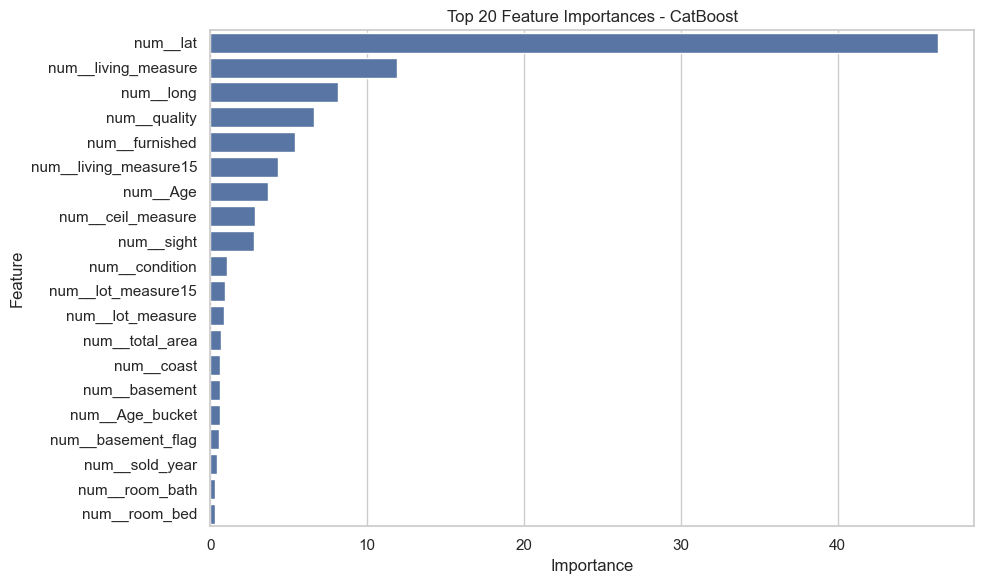

In [109]:
# Feature Importance
def plot_feature_importance_from_pipeline(pipe, top_n=20, title='Top Feature Importances'):
    # grab the fitted preprocessor and model
    pre = pipe.named_steps['prep']
    model = pipe.named_steps['model']

    # get transformed feature names from the preprocessor
    try:
        feature_names = pre.get_feature_names_out()
    except AttributeError:
        # older sklearn fallback
        feature_names = []
        for name, trans, cols in pre.transformers_:
            if name != 'remainder':
                if hasattr(trans, 'get_feature_names_out'):
                    feature_names.extend(trans.get_feature_names_out(cols))
                else:
                    feature_names.extend(cols)

    importances = getattr(model, 'feature_importances_', None)
    if importances is None:
        raise ValueError("This model does not expose 'feature_importances_'.")

    if len(importances) != len(feature_names):
        raise ValueError(
            f"Length mismatch: importances={len(importances)} vs features={len(feature_names)}. "
            "Make sure you pass the fitted pipeline used for training."
        )

    fi = (pd.DataFrame({'Feature': feature_names, 'Importance': importances})
            .sort_values('Importance', ascending=False)
            .head(top_n))

    plt.figure(figsize=(10, 6))
    sns.barplot(data=fi, x='Importance', y='Feature')
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()


# Print the top 20 features based on importance
plot_feature_importance_from_pipeline(pipe_cb, top_n=20, title='Top 20 Feature Importances - CatBoost')




In [110]:
importances = CB.feature_importances_
CB.get_feature_importance(prettified=True)


,Feature Id,Importances
0,11,45.01
1,2,11.24
2,12,8.91
3,8,7.55
4,13,4.54
5,22,3.53
6,15,3.08
7,6,2.67
8,9,2.51
9,23,1.98


In [111]:
importances = CB.feature_importances_


In [112]:
importances = pipe_cb.named_steps['model'].feature_importances_


In [113]:
feature_names = pipe_cb.named_steps['prep'].get_feature_names_out()
importances = pipe_cb.named_steps['model'].feature_importances_

fi = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False).head(20)

print(fi)



                  Feature  Importance
11               num__lat       46.38
2     num__living_measure       11.91
12              num__long        8.17
8            num__quality        6.59
15         num__furnished        5.43
13  num__living_measure15        4.34
22               num__Age        3.67
9       num__ceil_measure        2.83
6              num__sight        2.79
7          num__condition        1.07
14     num__lot_measure15        0.96
3        num__lot_measure        0.89
16        num__total_area        0.69
5              num__coast        0.63
10          num__basement        0.62
23        num__Age_bucket        0.61
21     num__basement_flag        0.58
17         num__sold_year        0.44
1          num__room_bath        0.31
0           num__room_bed        0.29


Insights from the graph:

Latitude (num__lat) emerged as the top predictor, indicating strong geographical influence — homes in specific latitudinal zones (likely premium neighborhoods) command higher prices.

Living area (num__living_measure) and construction quality (num__quality) follow, highlighting that larger and better-built homes are valued higher.

Zip code and city variables (e.g., Mercer Island, Seattle, Sammamish) show that location-based premiums persist across the dataset.

Age, furnishing, and aesthetic features such as sight and ceiling height also contribute, reflecting buyer preference for newer and well-designed properties.

Other attributes like lot area, condition, and basement have moderate influence.

location, living space, and quality are the key determinants of property price, while design, furnishing, and neighborhood factors provide secondary differentiation plays an important role in predicting the house price in the cat boost model.  Some features include latitude, living_measure, quality, longitude, living_measure15, etc

## **Ensemble modelling**

In [114]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Create the stacking ensemble as Catboost, Light gbm, linear regression as base model and Ridge regression

# selectors
num_sel = make_column_selector(dtype_include=np.number)
cat_sel = make_column_selector(dtype_include=object)

# preprocessing
preprocess_linear = ColumnTransformer([
    ('num', Pipeline([('imp', SimpleImputer(strategy='median')),
                      ('sc', StandardScaler())]), num_sel),
    ('cat', Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                      ('oh', OneHotEncoder(handle_unknown='ignore'))]), cat_sel)
])

preprocess_tree = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_sel),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_sel)
])

# base learners as pipelines
base_estimators = []

# CatBoost (optional)
try:
    import catboost as cb
    cb_pipe = Pipeline([
        ('prep', preprocess_tree),
        ('model', cb.CatBoostRegressor(
            iterations=800, learning_rate=0.05, depth=6,
            loss_function='RMSE', verbose=False, random_state=42))
    ])
    base_estimators.append(('catboost', cb_pipe))
except Exception:
    pass

# LightGBM (optional)
try:
    import lightgbm as lgb
    lgbm_pipe = Pipeline([
        ('prep', preprocess_tree),
        ('model', lgb.LGBMRegressor(
            n_estimators=800, learning_rate=0.05,
            num_leaves=31, subsample=0.8, colsample_bytree=0.8,
            reg_lambda=1.0, random_state=42))
    ])
    base_estimators.append(('lgbm', lgbm_pipe))
except Exception:
    pass

# Linear Regression
lin_pipe = Pipeline([
    ('prep', preprocess_linear),
    ('model', LinearRegression())
])
base_estimators.append(('linear', lin_pipe))

# meta-learner (uses base models' predictions, so no preprocess needed here)
meta_ridge = Ridge()

# build the stack
stack = StackingRegressor(
    estimators=base_estimators,
    final_estimator=meta_ridge,
    cv=5,            # out-of-fold preds for meta learner
    n_jobs=-1
)

# split your original features/target
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the stack (do NOT fit base models separately)
stack.fit(X_tr, y_tr)

# evaluate
pred = stack.predict(X_te)
r2  = r2_score(y_te, pred)
rmse = np.sqrt(mean_squared_error(y_te, pred))

def adjusted_r2_score(y_true, y_pred, p):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

adj_r2 = adjusted_r2_score(y_te, pred, p=X_tr.shape[1])

print(f"R² (stack): {r2:.4f}")
print(f"Adjusted R² (stack): {adj_r2:.4f}")
print(f"RMSE (stack): {rmse:.2f}")


R² (stack): 0.8957
Adjusted R² (stack): 0.8924
RMSE (stack): 77043.59


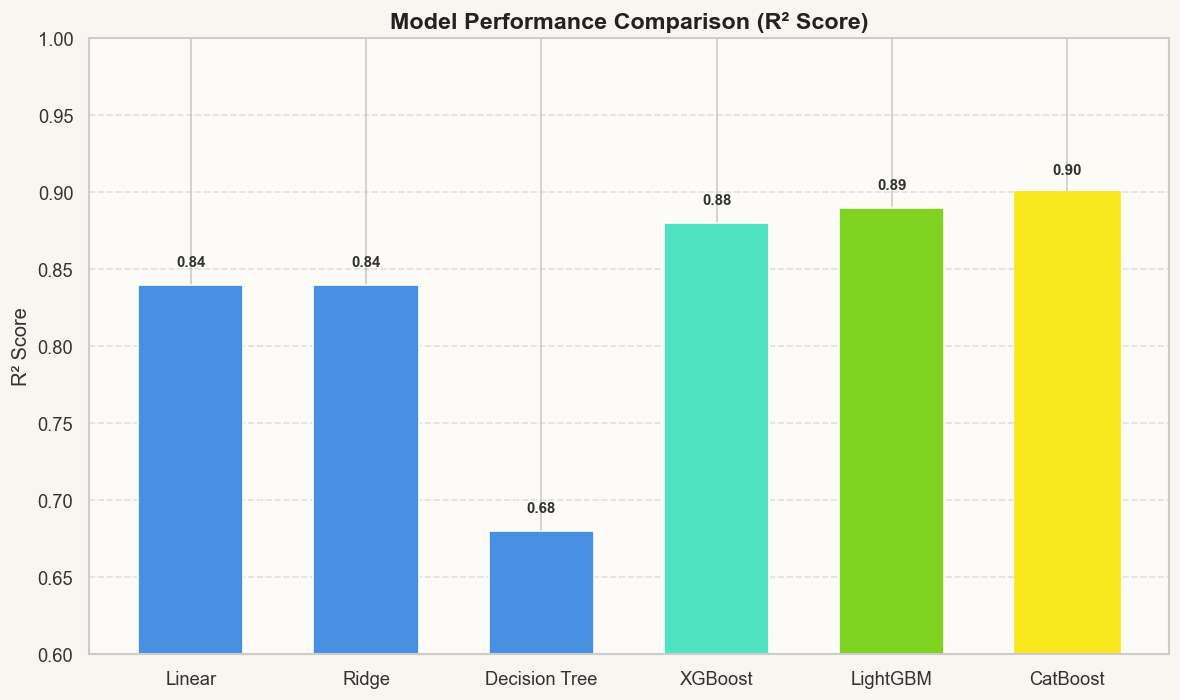

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear', 'Ridge', 'Decision Tree', 'XGBoost', 'LightGBM', 'CatBoost']

# R² scores
r2_scores = [0.84, 0.84, 0.68, 0.88, 0.89, 0.90]

# Create figure
fig, ax = plt.subplots(figsize=(10,6), dpi=120)

# --- Background color ---
fig.patch.set_facecolor('#f9f6f1')     # Light beige background for figure
ax.set_facecolor('#fdfbf8')            # Slightly lighter background for plot area

# --- Bars ---
colors = ['#4a90e2', '#4a90e2', '#4a90e2', '#50e3c2', '#7ed321', '#f5a623']
bars = ax.bar(models, r2_scores, color=colors, width=0.6, edgecolor='white')

# Highlight best model (CatBoost)
bars[-1].set_color('#f8e71c')  # Gold/yellow for best performer

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', 
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='#333')

# --- Aesthetic styling ---
ax.set_title('Model Performance Comparison (R² Score)', fontsize=14, fontweight='bold', color='#222')
ax.set_ylabel('R² Score', fontsize=12, color='#333')
ax.set_ylim(0.6, 1.0)
ax.tick_params(axis='x', colors='#333')
ax.tick_params(axis='y', colors='#333')

# Grid styling
plt.grid(axis='y', linestyle='--', alpha=0.4, color='#bbb')

plt.tight_layout()
plt.show()
